### <b><u> Brain Networks and Graphs - Final Assignment: </b></u>

* Imports

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

0. Loading the files

In [172]:
struct_labels = np.load('struct_labels.npy')
structural_matrix = np.load('structural_matrix.npy')

* Aligning struct_labels to structural_matrix indices:

In [173]:
struct_labels = struct_labels.astype(int) - 1
struct_labels = np.sort(struct_labels)

In [174]:
np.shape(struct_labels)

(246,)

In [175]:
struct_labels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [176]:
np.shape(structural_matrix)

(246, 246)

In [177]:
structural_matrix

array([[ 0,  2,  6, ...,  1,  0,  4],
       [ 2, 12, 12, ...,  0,  0,  0],
       [ 6, 12, 17, ...,  6,  3,  0],
       ...,
       [ 1,  0,  6, ...,  0,  1,  1],
       [ 0,  0,  3, ...,  1,  2,  1],
       [ 4,  0,  0, ...,  1,  1,  1]], dtype=int64)

* Set the diagonal elements to zero to ignore self-connections:

In [178]:
np.fill_diagonal(structural_matrix, 0)

1. a. Calculating <b>node strength:</b>

In [179]:
def calculate_node_strength(matrix) -> list[int]:
    return np.sum(matrix, axis=1)

In [180]:
node_strength = calculate_node_strength(structural_matrix)

b. Plotting a Histogram for <b>node strength</b> measure:

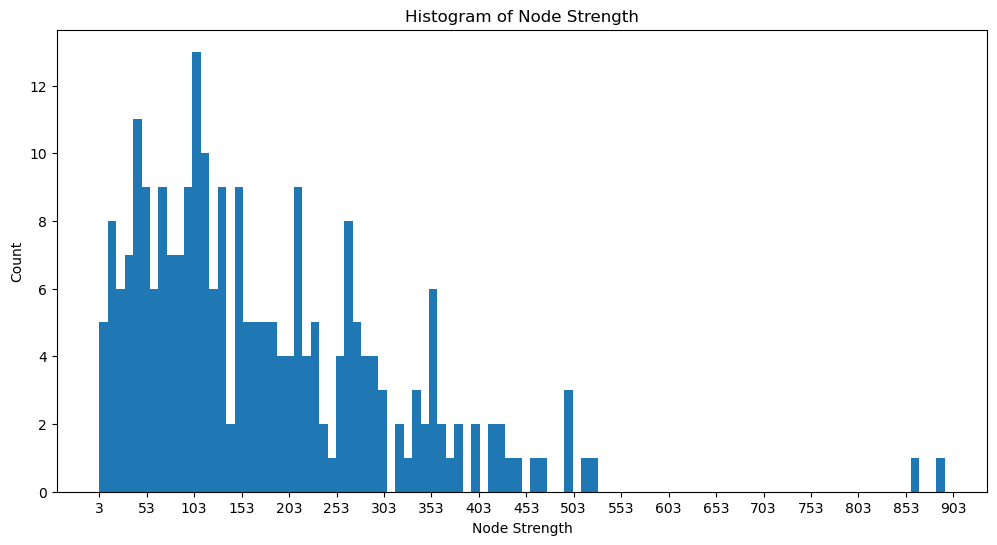

In [181]:
plt.figure(figsize=(12, 6))
plt.hist(node_strength, bins= 100)
plt.title('Histogram of Node Strength')
plt.xlabel('Node Strength')
plt.ylabel('Count')

plt.xticks(np.arange(min(node_strength), max(node_strength) + 50, 50))

plt.show()

In [182]:
def calculate_node_degree(matrix) -> list[int]:
    return np.sum(matrix > 0, axis=1)

In [183]:
node_degree = calculate_node_degree(structural_matrix)

* Plotting a Histogram for <b>node degree</b> measure:

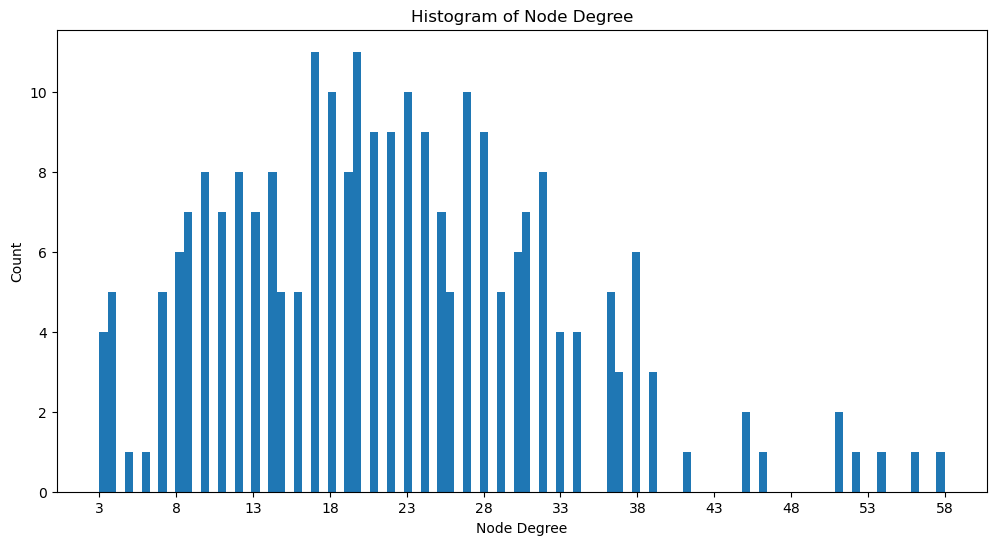

In [184]:
plt.figure(figsize=(12, 6))
plt.hist(node_degree, bins = 100)
plt.title('Histogram of Node Degree')
plt.xlabel('Node Degree')
plt.ylabel('Count')

plt.xticks(np.arange(min(node_degree), max(node_degree) + 5, 5))

plt.show()

2. Rich Club Coefficients:

In [185]:
def calculate_rich_club_coefficient(matrix, k) -> float:
    degrees = np.sum(matrix > 0, axis=1)
    rich_nodes = np.where(degrees > k)[0]
    
    subgraph = matrix[np.ix_(rich_nodes, rich_nodes)]
    
    E_greater_k = np.count_nonzero(subgraph) / 2
    N_greater_k = len(rich_nodes)
    
    if N_greater_k < 2:
        return 0
    
    phi_k = (2 * E_greater_k) / (N_greater_k * (N_greater_k - 1))
    
    return phi_k

In [186]:
max_degree = np.max(node_degree)
k_values = range(max_degree)
rich_club_coefficients = [calculate_rich_club_coefficient(structural_matrix, k) for k in k_values]

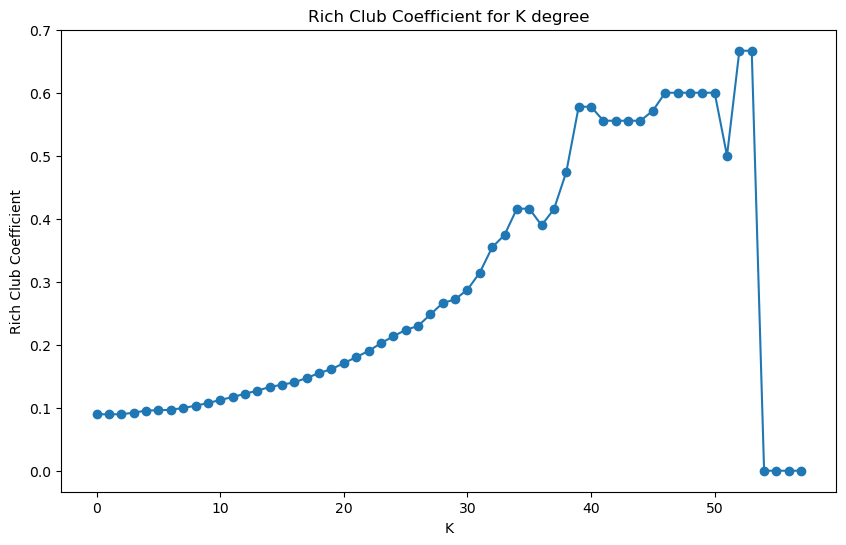

In [187]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, rich_club_coefficients, marker='o')
plt.xlabel('K')
plt.ylabel('Rich Club Coefficient')
plt.title('Rich Club Coefficient for K degree')

plt.show()

3. K-Core:

In [188]:
def calculate_nodes_number_in_k_core(matrix, k) -> int:
    degrees = np.sum(matrix > 0, axis=1)
    remaining_nodes = np.sum(degrees >= k)

    return remaining_nodes

In [189]:
node_counts = []

for k in k_values:
    nodes_num_in_k_core = calculate_nodes_number_in_k_core(structural_matrix, k)
    node_counts.append(nodes_num_in_k_core)

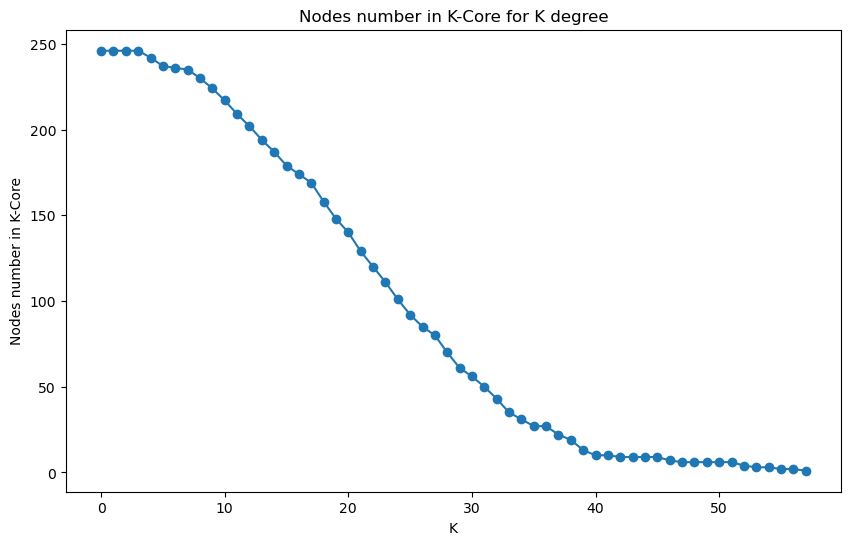

In [190]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, node_counts, marker='o')
plt.xlabel('K')
plt.ylabel('Nodes number in K-Core')
plt.title('Nodes number in K-Core for K degree')

plt.show()

4. Integration and segragation:

Represent our matrix as a graph:

In [191]:
graph = nx.from_numpy_array(structural_matrix)

In [192]:
nx.is_connected(graph)

True

* <u>Integration</u> - Shortest Path:

In [193]:
def get_avg_shortest_path_per_node(graph) -> list:
    shortest_paths = dict(nx.all_pairs_dijkstra_path_length(graph))

    avg_path_lengths = []
    for source, target_lengths in shortest_paths.items():
        node_path_lengths = []
        for target, length in target_lengths.items():
            if source != target:  # Exclude self-connections
                node_path_lengths.append(length)

        avg_path_lengths.append(np.mean(node_path_lengths))

    return avg_path_lengths    

In [194]:
def plot_avg_shortest_path_per_node(avg_path_lengths: list) -> None:
    plt.figure(figsize=(20, 6))
    plt.bar(range(len(avg_path_lengths)), avg_path_lengths, color='skyblue')
    plt.xlabel('Node')
    plt.ylabel('Average Shortest Path Length')
    plt.title('Average Shortest Path Length per Node')
    plt.xticks(np.arange(0, len(node_degree) + 10, 10))
    plt.show()

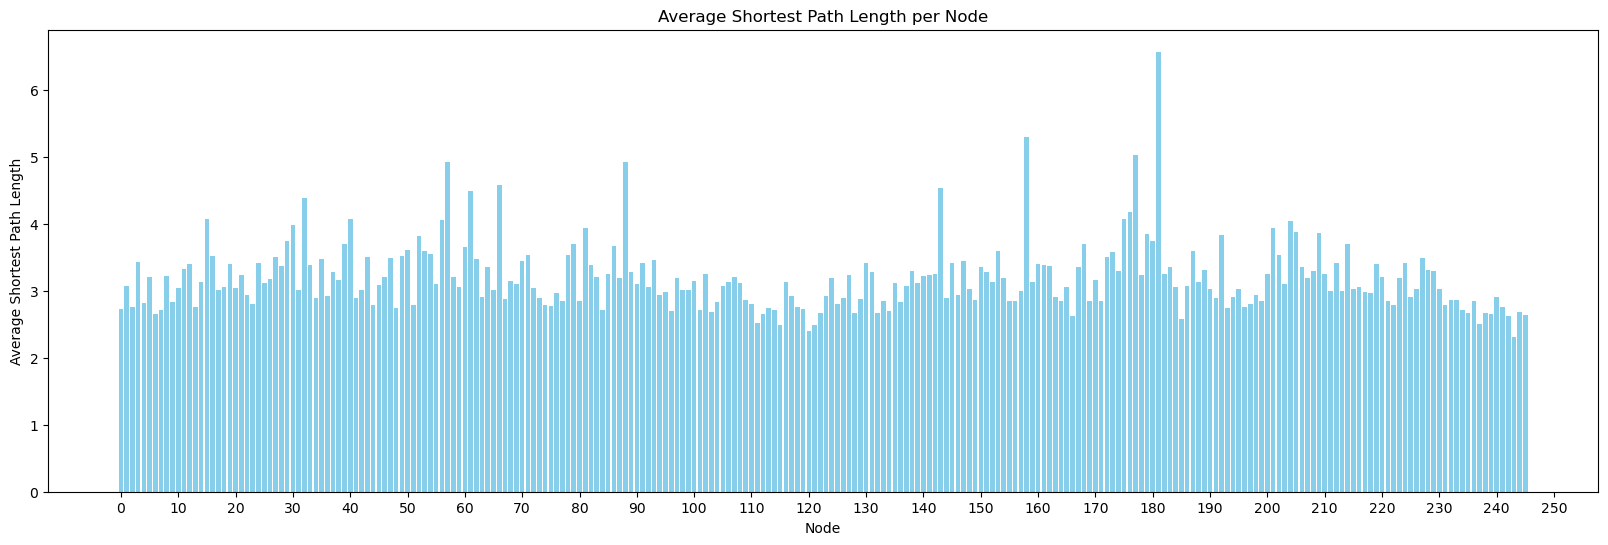

In [195]:
avg_path_lengths = get_avg_shortest_path_per_node(graph)
plot_avg_shortest_path_per_node(avg_path_lengths)

* <u>Segragation:</u> Clustering Coefficient

In [196]:
def create_random_graph(original_graph):
    degree_sequence = [d for _, d in original_graph.degree()]

    #a random graph with the same degree sequence
    random_graph = nx.configuration_model(degree_sequence)

    random_graph = nx.Graph(random_graph)
    random_graph.remove_edges_from(nx.selfloop_edges(random_graph))

    return random_graph

In [197]:
random_graph = create_random_graph(graph)

In [198]:
def get_avg_clustering_coefficient_compared_to_random(original_graph, random_graph) -> tuple[float,float]:
    average_clustering_original = nx.average_clustering(original_graph)
    average_clustering_random = nx.average_clustering(random_graph)

    return average_clustering_original, average_clustering_random

In [199]:
def plot_clustering_coefficient(average_clustering_original: float, average_clustering_random: float) -> None:
    labels = ['Original', 'Random']
    values = [average_clustering_original, average_clustering_random]
    
    plt.figure(figsize=(5, 5))
    plt.bar(labels, values, color=['skyblue', 'royalblue'])
    plt.ylabel('Average Clustering Coefficient')
    plt.title('Comparison of Clustering Coefficients')
    
    plt.show()

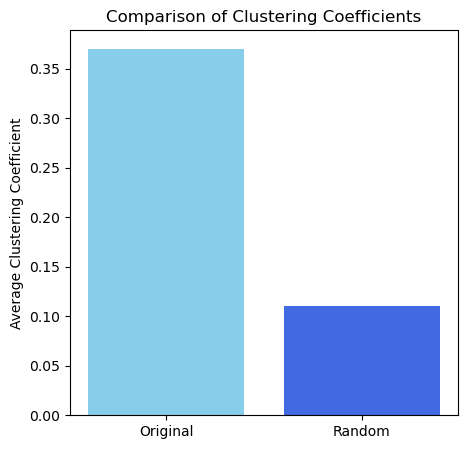

In [200]:
average_clustering_original, average_clustering_random = get_avg_clustering_coefficient_compared_to_random(graph, random_graph)
plot_clustering_coefficient(average_clustering_original, average_clustering_random)

In [201]:
average_clustering_random / average_clustering_original

0.2991763088338885

Compare shortest path to random:

In [202]:
average_shortest_path_length_original = nx.average_shortest_path_length(graph)
average_shortest_path_length_random = nx.average_shortest_path_length(random_graph)

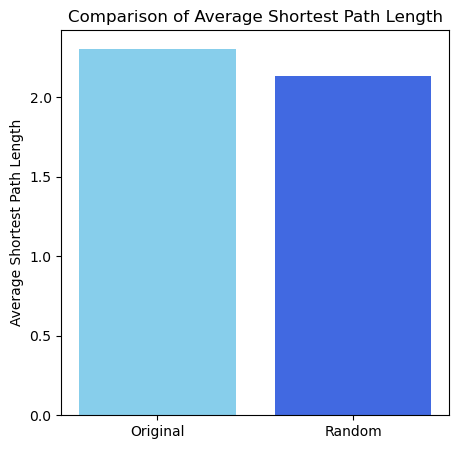

In [203]:
labels = ['Original', 'Random']
values = [average_shortest_path_length_original, average_shortest_path_length_random]

plt.figure(figsize=(5, 5))
plt.bar(labels, values, color=['skyblue', 'royalblue'])
plt.ylabel('Average Shortest Path Length')
plt.title('Comparison of Average Shortest Path Length')
plt.show()

5. Choose one central node for removal:

* Choosing central node by <b> Weighted Degree Centrality</b>

In [204]:
max_node_strength_index = np.argmax(calculate_node_strength(structural_matrix))
max_node_strength_index

236

* Removing that node:

In [205]:
structural_matrix = np.delete(structural_matrix, max_node_strength_index, axis=0)
structural_matrix = np.delete(structural_matrix, max_node_strength_index, axis=1)

* <u>Integration</u> - Shortest Path:


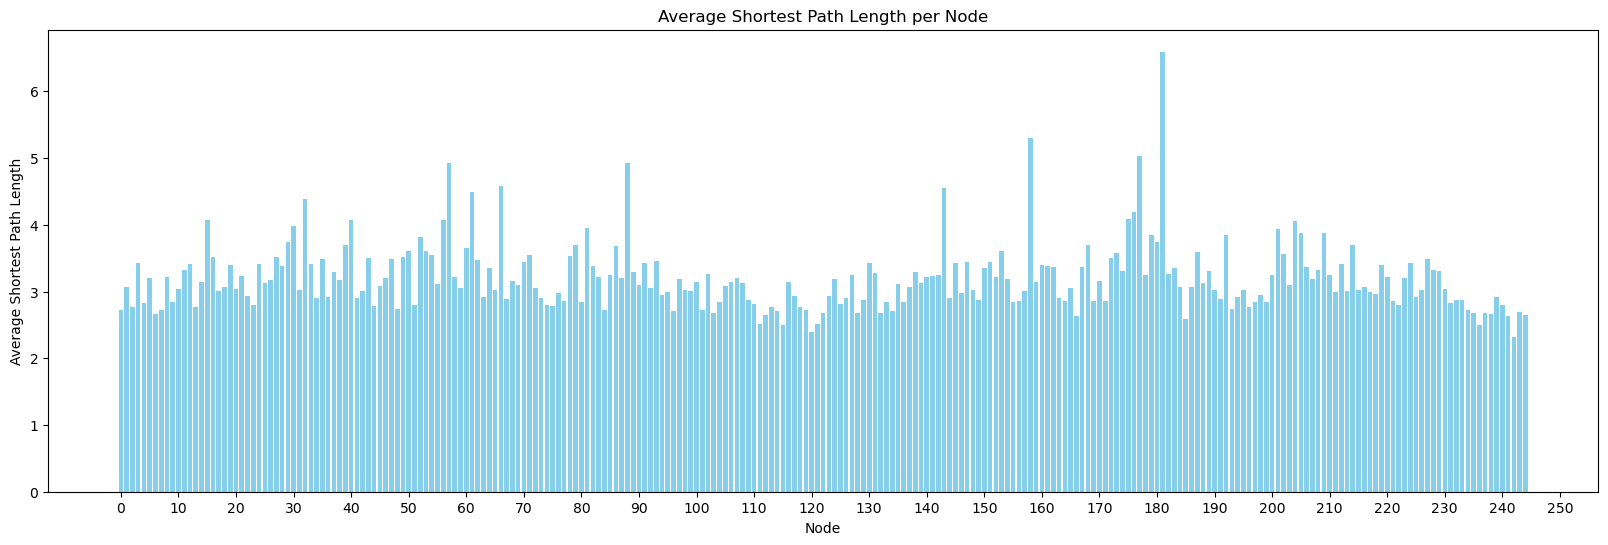

In [206]:
graph_after_removal = nx.from_numpy_array(structural_matrix)
avg_path_lengths_after_removal = get_avg_shortest_path_per_node(graph_after_removal)
plot_avg_shortest_path_per_node(avg_path_lengths_after_removal)

In [207]:
def find_differences_with_removed_index(list_before, list_after, removed_index) -> dict:
    diff_indices = {}
    
    for i in range(removed_index):
        if list_before[i] != list_after[i]:
            diff_indices[i] = {'before': list_before[i], 'after_removal': list_after[i]}
    
    if list_before[removed_index] != list_after[removed_index + 1]:
        diff_indices[removed_index] = {'before': list_before[removed_index], 'after_removal': list_after[removed_index + 1]}
    
    return diff_indices

Check for the differences:

In [208]:
find_differences_with_removed_index(avg_path_lengths, avg_path_lengths_after_removal, 236)

{0: {'before': 2.726530612244898, 'after_removal': 2.7295081967213113},
 1: {'before': 3.0693877551020408, 'after_removal': 3.0655737704918034},
 2: {'before': 2.76734693877551, 'after_removal': 2.7745901639344264},
 3: {'before': 3.4285714285714284, 'after_removal': 3.4262295081967213},
 4: {'before': 2.820408163265306, 'after_removal': 2.8237704918032787},
 5: {'before': 3.204081632653061, 'after_removal': 3.2049180327868854},
 6: {'before': 2.657142857142857, 'after_removal': 2.6598360655737703},
 7: {'before': 2.7142857142857144, 'after_removal': 2.721311475409836},
 8: {'before': 3.220408163265306, 'after_removal': 3.221311475409836},
 9: {'before': 2.836734693877551, 'after_removal': 2.8442622950819674},
 10: {'before': 3.0448979591836736, 'after_removal': 3.0450819672131146},
 11: {'before': 3.3224489795918366, 'after_removal': 3.319672131147541},
 12: {'before': 3.4081632653061225, 'after_removal': 3.4057377049180326},
 13: {'before': 2.759183673469388, 'after_removal': 2.76639

* <u>Segragation:</u> Clustering Coefficient

In [209]:
random_graph_after_removal = create_random_graph(graph_after_removal)

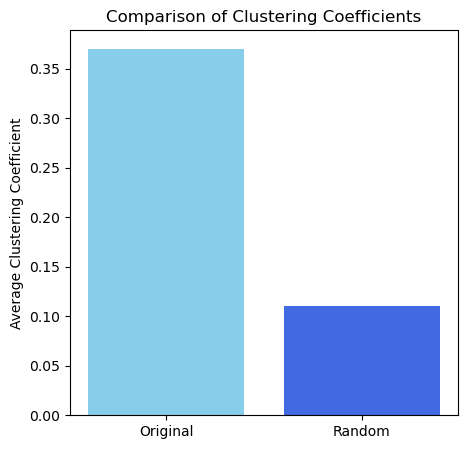

In [210]:
average_clustering_original_after_removal, average_clustering_random_after_removal = get_avg_clustering_coefficient_compared_to_random(graph_after_removal, random_graph_after_removal)
plot_clustering_coefficient(average_clustering_original, average_clustering_random)

Check for the differences:

In [211]:
average_clustering_original_after_removal - average_clustering_original

-0.002588844020349479